<a href="https://colab.research.google.com/github/shoham529-byte/1-repo/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
import random

In [110]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")
print(f"Dataset shape: {df.shape}")
df.sample(5)

Dataset shape: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
89,Libya,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12100
78,Jordan,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3680
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
139,Spain,3.8,25.5,9.54,26.8,32500,0.16,81.9,1.37,30700


In [111]:
print("Null values per column:")
print("\nPercentage of null values:")
print((df.isnull().sum() / len(df)) * 100)

Null values per column:

Percentage of null values:
country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


In [112]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


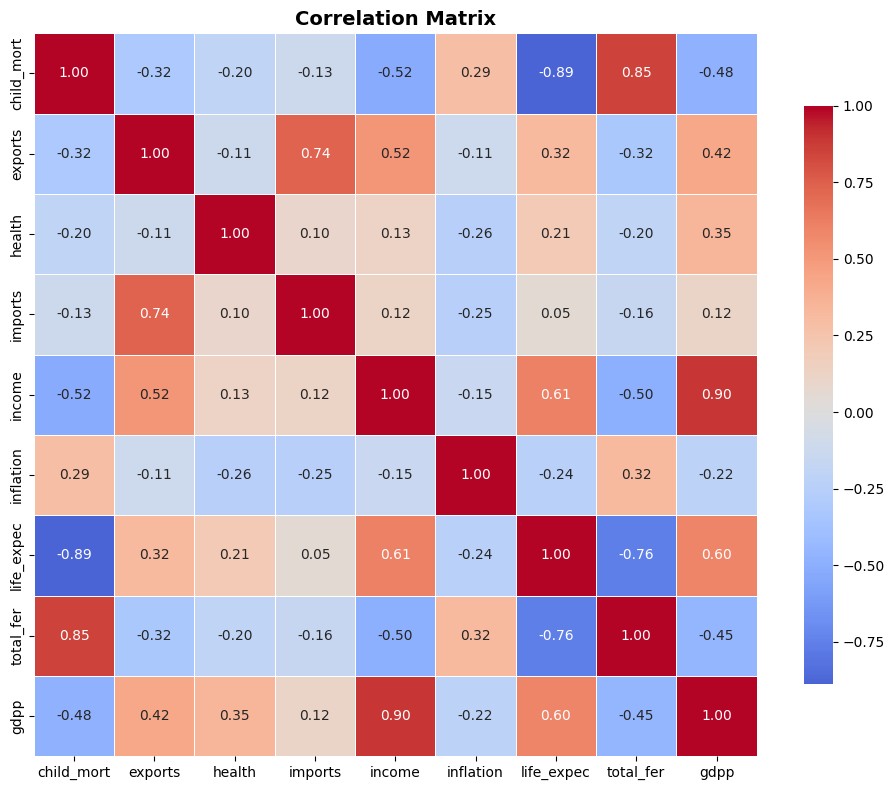

In [113]:
correlation = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [114]:
df['country'].value_counts()

,count
country,
Afghanistan,1
Albania,1
Algeria,1
Angola,1
Antigua and Barbuda,1
...,...
Vanuatu,1
Venezuela,1
Vietnam,1


In [115]:
X=df.drop('country',axis=1)
y=df['country']


In [116]:
df = df.sample(frac=1).reset_index(drop=True)

# Split features and labels
X = df.drop('country', axis=1)
y = df['country']

# Train-test split
split = int(0.8 * len(df))

X_train = X.iloc[:split]
X_test = X.iloc[split:]

y_train = y.iloc[:split]
y_test = y.iloc[split:]

# Scale using TRAIN statistics only
mean = X_train.mean()
std = X_train.std()

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

In [117]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        # <-- convert DataFrame to numpy array so indexing works as expected
        X = np.asarray(X)

        # randomly pick initial centroids
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids.copy()
            self.centroids = self.move_centroids(X, cluster_group)
            if np.allclose(old_centroids, self.centroids):
                break

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        for row in X:
            distances = []
            for centroid in self.centroids:
                dist = np.sqrt(np.dot(row - centroid, row - centroid))
                distances.append(dist)
            min_index = np.argmin(distances)
            cluster_group.append(min_index)
        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for k in range(self.n_clusters):
            new_centroids.append(X[cluster_group == k].mean(axis=0))
        return np.array(new_centroids)

In [118]:
X_array = np.asarray(X_train_scaled)
inertias = []
K = range(1, 20)

for k in K:
    km = KMeans(n_clusters=k, max_iter=300)
    labels = km.fit_predict(X_array)

    # Optimized inertia calculation
    inertia = np.sum((X_array - km.centroids[labels]) ** 2)
    inertias.append(inertia)

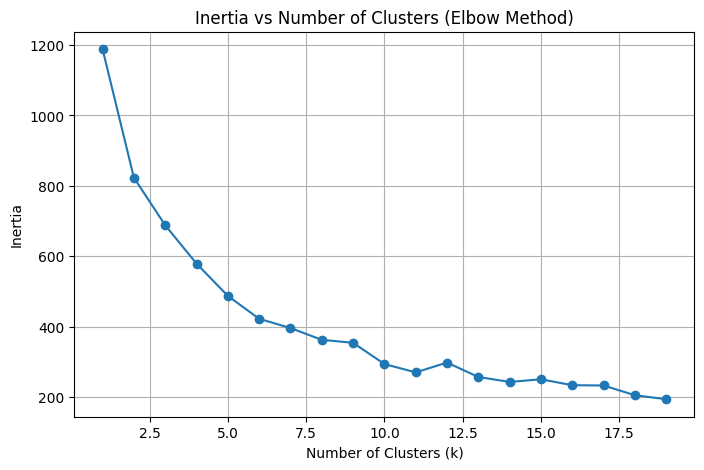

In [119]:
plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters (Elbow Method)')
plt.grid(True)
plt.show()

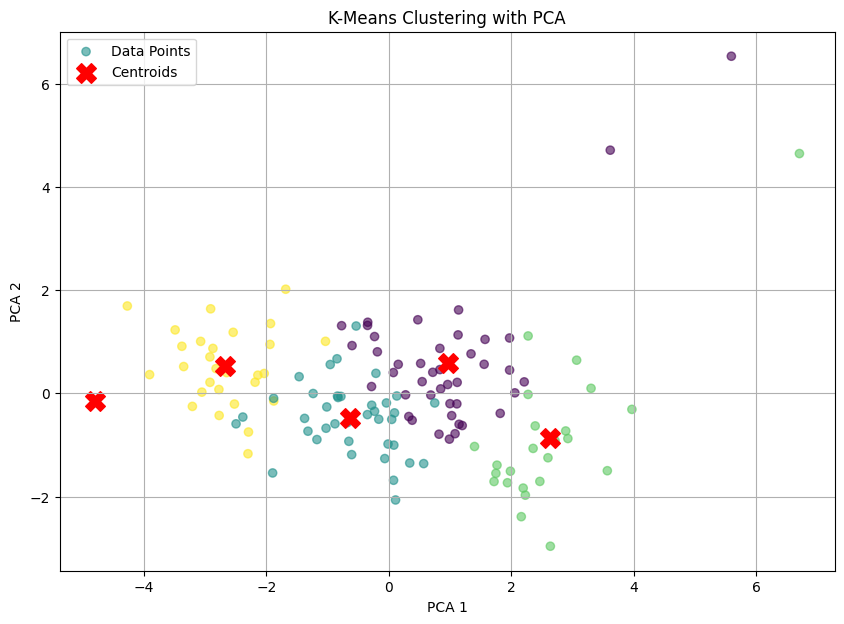

In [120]:
optimal_k = 5
km = KMeans(n_clusters=optimal_k, max_iter=300)
labels = km.fit_predict(X_train_scaled)

# 2. Compress the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

# 3. Compress the centroids to the SAME 2 dimensions
# (We use transform(), not fit_transform(), because the space is already defined by X)
centroids_pca = pca.transform(km.centroids)

# 4. Plot
#
plt.figure(figsize=(10, 7))

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
def pairwise_distances(X):
    n = X.shape[0]
    dist = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            dist[i, j] = np.sqrt(np.sum((X[i] - X[j]) ** 2))

    return dist

def silhouette_score_manual(X, labels):
    X = np.array(X)
    labels = np.array(labels)

    n_samples = X.shape[0]
    unique_labels = np.unique(labels)

    dist_matrix = pairwise_distances(X)

    silhouette_vals = []

    for i in range(n_samples):
        # indices of points in same cluster
        same_cluster_idx = np.where(labels == labels[i])[0]
        same_cluster_idx = same_cluster_idx[same_cluster_idx != i]

        # a(i): mean intra-cluster distance
        if len(same_cluster_idx) > 0:
            a = np.mean(dist_matrix[i, same_cluster_idx])
        else:
            a = 0

        # b(i): min mean distance to other clusters
        b = np.inf
        for lbl in unique_labels:
            if lbl != labels[i]:
                other_cluster_idx = np.where(labels == lbl)[0]
                if len(other_cluster_idx) > 0:
                    b = min(b, np.mean(dist_matrix[i, other_cluster_idx]))

        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

score = silhouette_score_manual(X_train_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.23471200436724765


In [122]:
df['child_mort'].value_counts()
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
102,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
164,Egypt,29.1,21.3,4.66,26.6,9860,10.100,70.5,3.19,2600
10,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970
80,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310
155,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.440,71.6,2.07,6230


In [123]:
def classify_child_mort(x):
    if x <= 8.25:
        return 0   # Low
    elif x <= 62.1:
        return 1   # Medium
    else:
        return 2   # High

df['child_mort_class'] = df['child_mort'].apply(classify_child_mort)
df['child_mort_class'].value_counts()

,count
child_mort_class,
1,83
0,42
2,42


In [124]:
X = df.drop(columns=['child_mort', 'child_mort_class', 'country']).to_numpy()
y = df['child_mort_class'].to_numpy()


np.random.seed(100)
indices = np.random.permutation(len(X))

split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train = X[train_idx]
X_test  = X[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
std[std == 0] = 1  # safety

X_train_std = (X_train - mean) / std
X_test_std  = (X_test  - mean) / std


In [125]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def knn_predict(X_train, y_train, X_test, k=20):
    predictions = []

    for x_test in X_test:
        distances = []

        for x_train in X_train:
            distances.append(euclidean_distance(x_test, x_train))

        distances = np.array(distances)
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]

        values, counts = np.unique(k_labels, return_counts=True)
        prediction = values[np.argmax(counts)]

        predictions.append(prediction)

    return np.array(predictions)

In [126]:
def precision_manual(y_true, y_pred, average="macro"):
    cm, classes = confusion_matrix_manual(y_true, y_pred)
    precisions = []

    for i in range(len(classes)):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        precisions.append(precision)

    precisions = np.array(precisions)

    if average == "macro":
        return np.mean(precisions)

    if average == "weighted":
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(precisions * weights)

    return precisions

In [127]:
def recall_manual(y_true, y_pred, average="macro"):
    cm, classes = confusion_matrix_manual(y_true, y_pred)
    recalls = []

    for i in range(len(classes)):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp

        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        recalls.append(recall)

    recalls = np.array(recalls)

    if average == "macro":
        return np.mean(recalls)

    if average == "weighted":
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(recalls * weights)

    return recalls

In [128]:
def f1_score_manual(y_true, y_pred, average="macro"):
    precision = precision_manual(y_true, y_pred, average=None)
    recall = recall_manual(y_true, y_pred, average=None)

    f1 = np.where(
        (precision + recall) != 0,
        2 * precision * recall / (precision + recall),
        0
    )

    if average == "macro":
        return np.mean(f1)

    if average == "weighted":
        cm, _ = confusion_matrix_manual(y_true, y_pred)
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(f1 * weights)

    return f1

In [129]:
def confusion_matrix_manual(y_true, y_pred):
    # Ensure y_true and y_pred are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Get all unique classes present in true and predicted labels
    classes = np.unique(np.concatenate((y_true, y_pred)))
    n_classes = len(classes)

    # Initialize confusion matrix with zeros
    cm = np.zeros((n_classes, n_classes), dtype=int)

    # Create mappings from class value to index
    class_to_idx = {cls: i for i, cls in enumerate(classes)}

    # Populate confusion matrix
    for true_label, pred_label in zip(y_true, y_pred):
        true_idx = class_to_idx[true_label]
        pred_idx = class_to_idx[pred_label]
        cm[true_idx, pred_idx] += 1

    return cm, classes

def accuracy_manual(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = knn_predict(X_train_std, y_train, X_test_std, k=8)

cm, classes = confusion_matrix_manual(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classes:", classes)

print("Accuracy:", accuracy_manual(y_test, y_pred))
print("Precision (macro):", precision_manual(y_test, y_pred))
print("Recall (macro):", recall_manual(y_test, y_pred))
print("F1 Score (macro):", f1_score_manual(y_test, y_pred))

Confusion Matrix:
 [[ 9  2  0]
 [ 2 11  0]
 [ 0  2  8]]
Classes: [0 1 2]
Accuracy: 0.8235294117647058
Precision (macro): 0.8505050505050505
Recall (macro): 0.8214452214452215
F1 Score (macro): 0.830928330928331


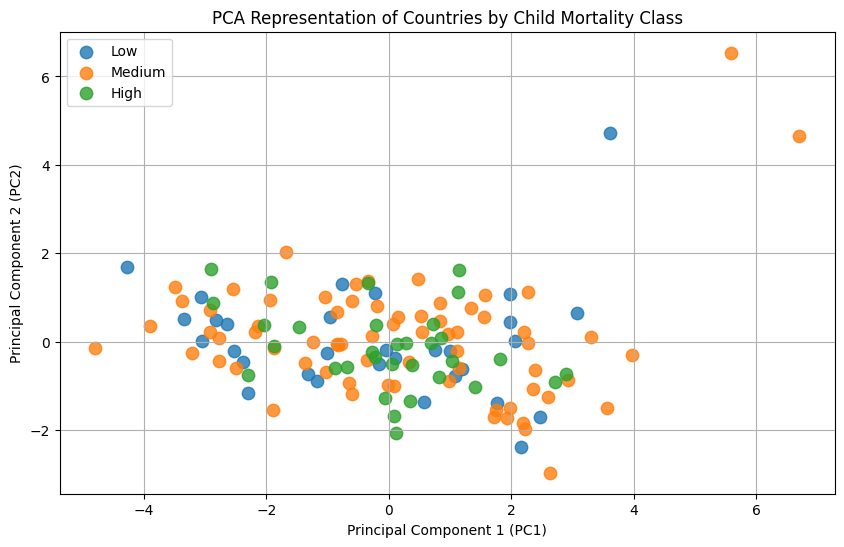

In [130]:
plt.figure(figsize=(10, 6))

colors = ['green', 'orange', 'red']
labels_map = ['Low', 'Medium', 'High']

for cls in np.unique(y_train):
    plt.scatter(
        X_pca[y_train == cls, 0],
        X_pca[y_train == cls, 1],
        label=labels_map[cls],
        alpha=0.8,
        s=80
    )

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Representation of Countries by Child Mortality Class")
plt.legend()
plt.grid(True)
plt.show()